In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv(r"c:\Lec and udemy\AI ML Intership\week8\housing_prices.csv")

In [17]:
print(df.head())

   SquareFootage  NumBedrooms  NumBathrooms  YearBuilt Neighborhood   Price
0           3119            1             1       1985     Downtown  622035
1           3271            5             1       2004     Downtown  715300
2            622            1             1       1979        Rural  106611
3           3432            5             2       1978       Suburb  715724
4           2913            3             1       1970        Rural  583466


In [19]:
df.tail()

,SquareFootage,NumBedrooms,NumBathrooms,YearBuilt,Neighborhood,Price
95,1151,4,2,1983,Downtown,248680
96,3111,3,3,2012,Rural,661926
97,3422,3,1,1984,Suburb,710141
98,1809,5,1,1967,Downtown,390107
99,3393,2,1,2003,Suburb,708381


In [21]:
df["Neighborhood"].value_counts()

Neighborhood
Downtown    38
Suburb      33
Rural       29
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SquareFootage  100 non-null    int64 
 1   NumBedrooms    100 non-null    int64 
 2   NumBathrooms   100 non-null    int64 
 3   YearBuilt      100 non-null    int64 
 4   Neighborhood   100 non-null    object
 5   Price          100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [23]:
df.columns

Index(['SquareFootage', 'NumBedrooms', 'NumBathrooms', 'YearBuilt',
       'Neighborhood', 'Price'],
      dtype='object')

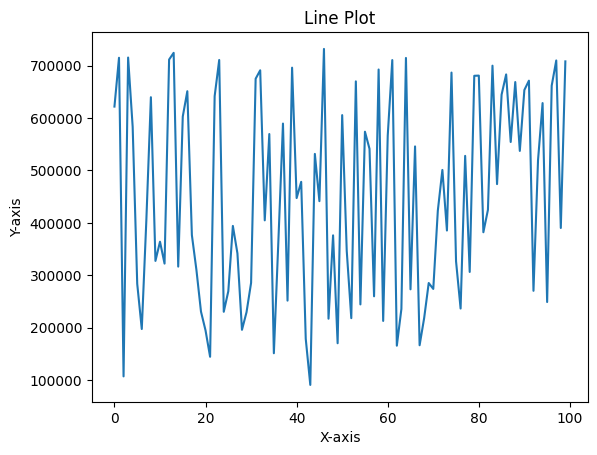

In [24]:
#line plot
plt.plot(df["Price"])
plt.title("Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

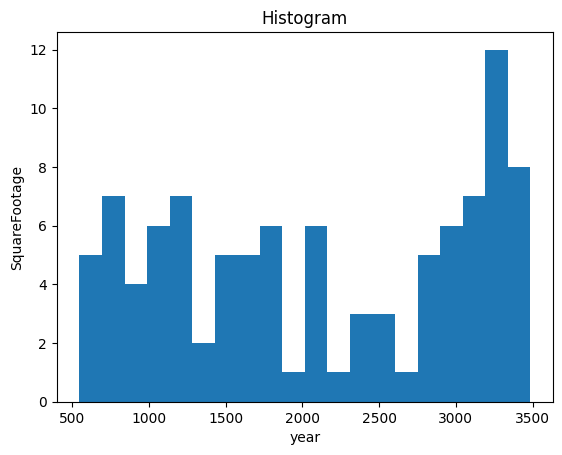

In [26]:
plt.hist(df["SquareFootage"],bins=20)
plt.title("Histogram")
plt.xlabel("year")
plt.ylabel("SquareFootage")
plt.show()

<Axes: >

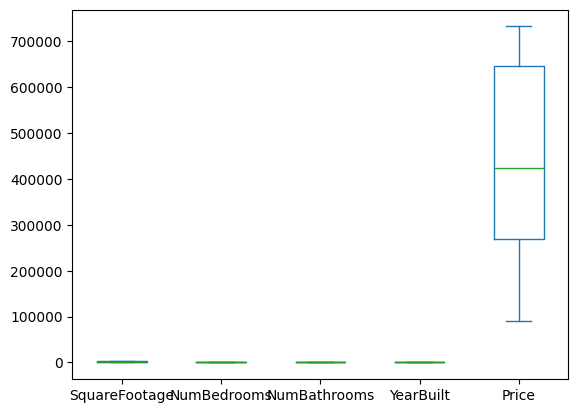

In [27]:
df.plot.box()

<Axes: >

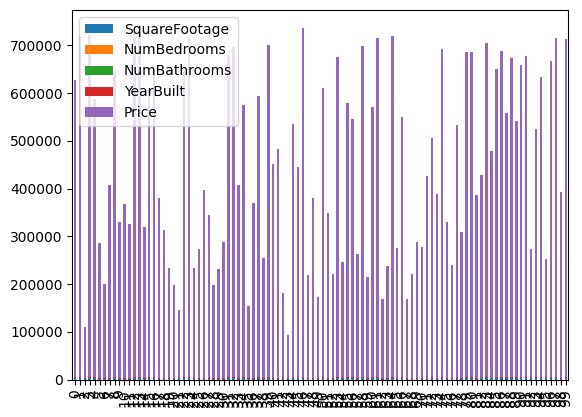

In [28]:
df.plot.bar(stacked=True)

In [45]:

from sklearn.preprocessing import LabelEncoder
le_neighborhood = LabelEncoder()
df["Neighborhood_LE"] = le_neighborhood.fit_transform(df["Neighborhood"])
print(df[["Neighborhood", "Neighborhood_LE"]].head())
df_ohe = pd.get_dummies(df, columns=["Neighborhood"], drop_first=True)
print(df_ohe.head())

  Neighborhood  Neighborhood_LE
0     Downtown                0
1     Downtown                0
2        Rural                1
3       Suburb                2
4        Rural                1
   SquareFootage  NumBedrooms  NumBathrooms  YearBuilt   Price  \
0           3119            1             1       1985  622035   
1           3271            5             1       2004  715300   
2            622            1             1       1979  106611   
3           3432            5             2       1978  715724   
4           2913            3             1       1970  583466   

   Neighborhood_LE  SquareFootage_std  Price_std  YearBuilt_std  \
0                0           1.054616   0.899928      -0.380668   
1                0           1.213009   1.379662       0.592776   
2                1          -1.547405  -1.751294      -0.688071   
3                2           1.380780   1.381843      -0.739305   
4                1           0.839951   0.701538      -1.149176   

   Squar

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df[["SquareFootage_std", "Price_std", "YearBuilt_std"]] = scaler.fit_transform(
    df[["SquareFootage", "Price", "YearBuilt"]]
)
print(df[["SquareFootage_std", "Price_std", "YearBuilt_std"]].head())
mm = MinMaxScaler()

print(df[["SquareFootage_minmax", "Price_minmax", "YearBuilt_minmax"]].head())
print(df.head())

   SquareFootage_std  Price_std  YearBuilt_std
0           1.054616   0.899928      -0.380668
1           1.213009   1.379662       0.592776
2          -1.547405  -1.751294      -0.688071
3           1.380780   1.381843      -0.739305
4           0.839951   0.701538      -1.149176
   SquareFootage_minmax  Price_minmax  YearBuilt_minmax
0              0.875128      0.828396          0.479452
1              0.926846      0.973697          0.739726
2              0.025519      0.025394          0.397260
3              0.981626      0.974358          0.383562
4              0.805036      0.768307          0.273973
   SquareFootage  NumBedrooms  NumBathrooms  YearBuilt Neighborhood   Price  \
0           3119            1             1       1985     Downtown  622035   
1           3271            5             1       2004     Downtown  715300   
2            622            1             1       1979        Rural  106611   
3           3432            5             2       1978       Subur

In [46]:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

X = df[['SquareFootage', 'NumBedrooms', 'YearBuilt']]

poly_features = poly.fit_transform(X)
poly_df = pd.DataFrame(
    poly_features,
    columns=poly.get_feature_names_out(X.columns)
)
print(poly_df.head())


   SquareFootage  NumBedrooms  YearBuilt  SquareFootage^2  \
0         3119.0          1.0     1985.0        9728161.0   
1         3271.0          5.0     2004.0       10699441.0   
2          622.0          1.0     1979.0         386884.0   
3         3432.0          5.0     1978.0       11778624.0   
4         2913.0          3.0     1970.0        8485569.0   

   SquareFootage NumBedrooms  SquareFootage YearBuilt  NumBedrooms^2  \
0                     3119.0                6191215.0            1.0   
1                    16355.0                6555084.0           25.0   
2                      622.0                1230938.0            1.0   
3                    17160.0                6788496.0           25.0   
4                     8739.0                5738610.0            9.0   

   NumBedrooms YearBuilt  YearBuilt^2  
0                 1985.0    3940225.0  
1                10020.0    4016016.0  
2                 1979.0    3916441.0  
3                 9890.0    3912484.0  
